In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
trails = pd.read_csv("trails_cleaned.csv")
trails.head()

,Unnamed: 0,trail_id,name,area_name,city_name,state_name,country_name,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,units,lat,lng,ada,beach,cave,city-walk,dogs,dogs-leash,dogs-no,forest,historic-site,hot-springs,kids,lake,partially-paved,paved,rails-trails,river,strollers,views,waterfall,wild-flowers,wildlife,backpacking,bike-touring,birding,camping,canoeing,cross-country-skiing,fishing,fly-fishing,hiking,horseback-riding,ice-climbing,mountain-biking,nature-trips,off-road-driving,paddle-sports,rails-trails.1,road-biking,rock-climbing,scenic-driving,sea-kayaking,skiing,snowboarding,snowshoeing,surfing,trail-running,walking,whitewater-kayaking,Elevation_gain_yards,Elevation_gain_Meters,Length_Meters,Length_Yards
0,0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,i,60.18852,-149.63156,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1161.8976,1062.439165,14274.330810,15610.598
1,1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,i,63.73049,-148.91968,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,507.7968,464.329394,6327.796133,6920.162
2,2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,i,60.18879,-149.63100,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,81.9912,74.972753,2648.844893,2896.812
3,3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,i,63.73661,-148.91500,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,119.7864,109.532684,3090.319042,3379.614
4,4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,i,63.73319,-148.89682,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1124.7120,1028.436653,27224.239180,29772.790


Part 1 Q1:

What is the length in miles of the fourth longest trail in California?

In [3]:
CA = trails[trails['state_name'] == 'California']

In [4]:
CA_length = CA.sort_values('length', ascending = False).reset_index()

In [5]:
CA_length['length'][3]*0.00062137

145.19936051016

The length of the fourth longest trail in CA is 145.20 miles.

Part 1 Q2:

Consider an “easy” trail to be one that has an elevation gain of less than 500 meters, a distance of less than 5 kilometers, and a difficulty rating below 4.

Which California National Park has the highest average rating of its “easy” trails?

In [6]:
elev_gain = CA[CA['elevation_gain'] < 500]

In [7]:
dist = elev_gain[elev_gain['length'] < 5000]

In [8]:
diff = dist[dist['difficulty_rating'] < 4]

In [9]:
diff.groupby('area_name').mean().sort_values('avg_rating', ascending = False).reset_index()['area_name'][0]

C:\Users\jamla\AppData\Local\Temp\ipykernel_1864\1429819421.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff.groupby('area_name').mean().sort_values('avg_rating', ascending = False).reset_index()['area_name'][0]


'Kings Canyon National Park'

Kings Canyon National Park has the highest average rating of it's easy trails.

Part 1 Question 4:

In [14]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

(ggplot(trails, aes(x="score"))
+ geom_density()
+ facet_wrap('~ measure', scales = 'free') 
+ ggtitle("Overall distribution of various trail scores in National parks")
)

PlotnineError: 'At least one layer must contain all variables used for facetting'

Part 1 Question 3:

In [10]:
by_area = trails.groupby("area_name").count().reset_index()


In [11]:
import re
park_str = ' '.join(by_area['area_name'].tolist())

In [12]:
len(re.findall('land', park_str))

3

Three National Parks contain the word land.

Part 1 Question 5:

C:\Users\jamla\anaconda33\Lib\site-packages\plotnine\scales\scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 2 values. 9 were requested from it.


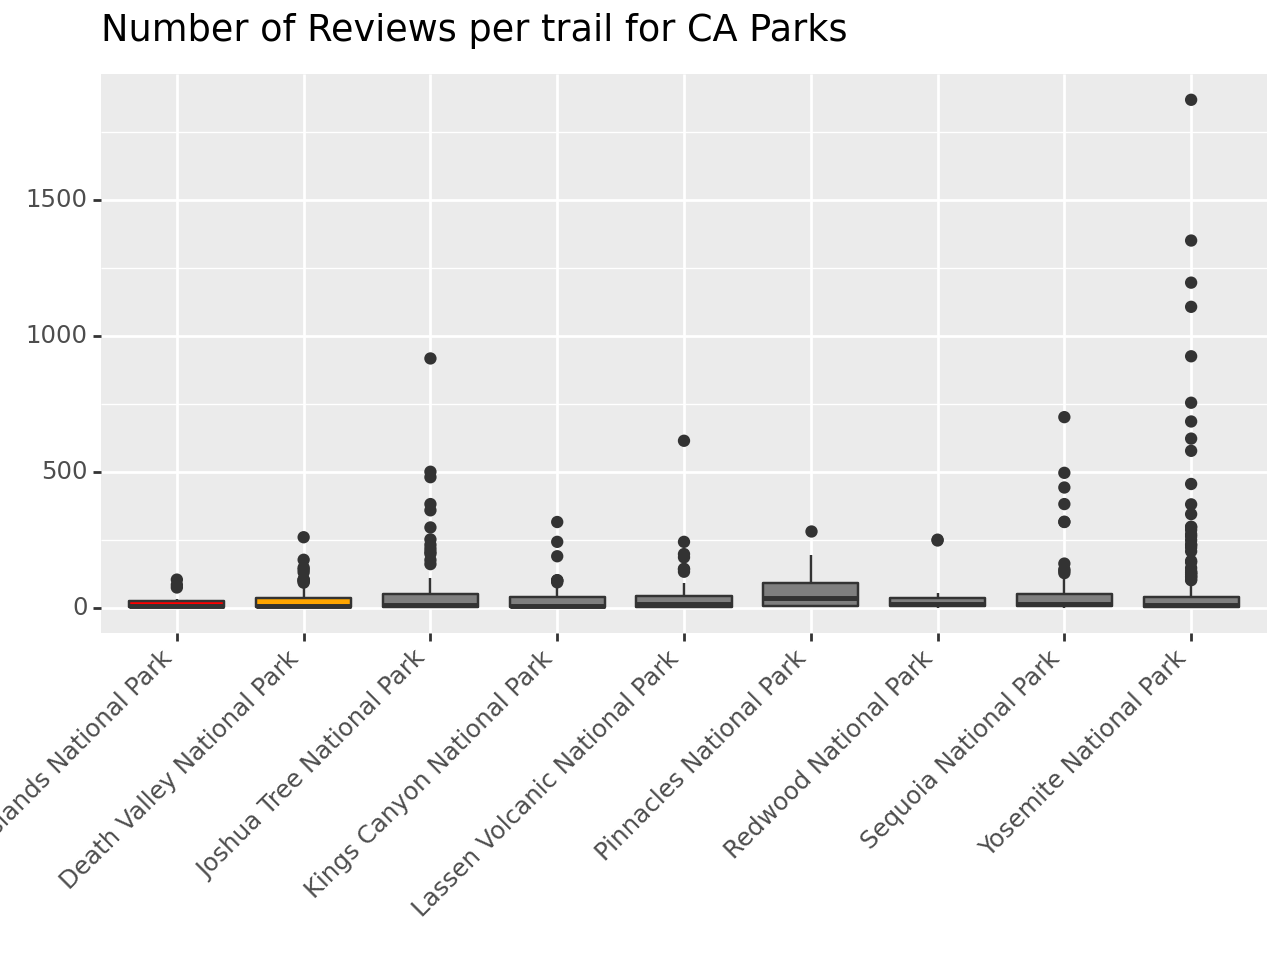

<Figure Size: (640 x 480)>

In [13]:
from plotnine import *
(ggplot(CA, aes(x="area_name", y="num_reviews", fill = 'area_name'))
+geom_boxplot()
 +scale_y_continuous()
 +scale_fill_manual(values = ['red', 'orange'], guide=False)
+labs( x='', y='', title= "Number of Reviews per trail for CA Parks")
 +theme(axis_text_x=element_text(rotation=45, hjust=1))
)

Part 2: Question 1:
        
Write a functions to help recommend trails to a user. The function will have as its input the dataset and the name of a National Park, and the following optional arguments:

A minimum trail elevation gain (in meters)
A maximum trail elevation gain (in meters)
A minimum trail rating
The type of trail
(Note: “optional” here means that the function can run even if the user doesn’t supply these arguments, not that they are optional for you to include in your function definition.)

The function should return all the trails that fit the supplied criteria. You may assume that the variable names of any inputted dataset match the np_trails dataset.

In [198]:
def recommend_trails(dataset, national_park, min_elev = 0, max_elevation = 10000000, min_rating = 0, trail_type = None):
    
    x = dataset[dataset['area_name'] == national_park]
    y = x[x['elevation_gain'] > min_elev]
    z = y[y['elevation_gain'] < max_elevation]
    a = z[z['avg_rating'] > min_rating]
    if trail_type == None:
        ans = a['name']
    else:
        b = a[a['route_type'] == trail_type]
        ans = b['name']
  
  
    return ans

In [199]:
recommend_trails(trails, "Haleakala National Park", min_elev = 1000, min_rating = 4)

3308    Silversword Loop Via Halemau'u Trail
3309                     Keonehe'ehe'e Trail
Name: name, dtype: object

Part 2: Question 2:
        
Write a function that takes one optional arguent, month.

The function should scrape the temperature website above for the desired month. If no month is specified then it should scrape the overall average temperatures. The function should return a data frame of the temperatures for the specified month in the names of the temperature columns.

Here is some starter code for this function:

In [203]:
import requests
from bs4 import BeautifulSoup

def scrape_month_temp(month = None):
    
    my_url = "https://www.extremeweatherwatch.com/us-state-averages" + "/month-" + month
    response = requests.get(my_url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    rows = []
    for i in soup.find_all("tr")[1:51]:
        name = i.find('a').text
        term = float(i.find_all('td')[1].text)
        term2 = float(i.find_all('td')[2].text)
        rows.append({"State": name, "High Temp": term, "Low Temp": term2})
    return pd.DataFrame(rows)

In [204]:
scrape_month_temp(month = "january")

,State,High Temp,Low Temp
0,Alabama,56.1,34.5
1,Alaska,10.7,-2.4
2,Arizona,55.7,30.6
3,Arkansas,50.0,30.5
4,California,54.6,35.0
5,Colorado,38.9,13.7
6,Connecticut,36.0,18.5
7,Delaware,43.9,26.5
8,Florida,69.5,47.0
9,Georgia,57.8,35.6


Part 2 Q3:

I am looking for a trail that is:

1000-3000 meters of elevation (I like mountains, but not too big.)

Rated at least a 4.5 on average

A loop trail (I don’t like to retrace my steps)

Not too cold in the summer, even at the peak

Use your recommend_trails function to find me a few good options.

Use your second function (scrape_temps) to gather information on temperatures for the summer months (i.e. May, June, July, August) in the states for these trails.

Merge these two datasets, so I can see all the recommended trails alongside their summer temps. If you were unable to scrape the information from the website, then feel free to import the temp_data.csv file and use average temperatures instead of summer temperatures to complete this question.

Convert the temperatures of the states to be the temperatures at the peak elevation of my recommended hikes. The temperature decreases by about 5.4 degrees Fahrenheit (or 9.8 degrees Celsius) for every 1000 feet you go up in elevation

In [205]:
rec = recommend_trails(trails, trails['area_name'], min_elev=1000, max_elevation=3000, min_rating=4.5, trail_type = 'loop')

In [206]:
rec = rec.tolist()

In [207]:
filtered_trails = trails[trails['name'].isin(rec)]

In [208]:
may = scrape_month_temp(month = "may").rename(columns={'High Temp': 'May High Temp', 'Low Temp': 'May Low Temp'})

In [209]:
june = scrape_month_temp(month = "june").rename(columns={'High Temp': 'June High Temp', 'Low Temp': 'June Low Temp'})

In [210]:
july = scrape_month_temp(month = "july").rename(columns={'High Temp': 'July High Temp', 'Low Temp': 'July Low Temp'})

In [211]:
august = scrape_month_temp(month = "august").rename(columns={'High Temp': 'August High Temp', 'Low Temp': 'August Low Temp'})

In [212]:
may_added = filtered_trails.merge(may, how = 'left', left_on = 'state_name', right_on = 'State')

In [213]:
june_added = may_added.merge(june, how = 'left', left_on = 'state_name', right_on = 'State')

In [214]:
july_added = june_added.merge(july, how = 'left', left_on = 'state_name', right_on = 'State')

In [215]:
august_added = july_added.merge(august, how = 'left', left_on = 'state_name', right_on = 'State')

C:\Users\jamla\AppData\Local\Temp\ipykernel_26124\3069550703.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'State_x'} in the result is deprecated and will raise a MergeError in a future version.
  august_added = july_added.merge(august, how = 'left', left_on = 'state_name', right_on = 'State')


In [216]:
combined = august_added.drop(['State_x', 'State_y'], axis=1)

,Unnamed: 0,trail_id,name,area_name,city_name,state_name,country_name,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,units,lat,lng,ada,beach,cave,city-walk,dogs,dogs-leash,dogs-no,forest,historic-site,hot-springs,kids,lake,partially-paved,paved,rails-trails,river,strollers,views,waterfall,wild-flowers,wildlife,backpacking,bike-touring,birding,camping,canoeing,cross-country-skiing,fishing,fly-fishing,hiking,horseback-riding,ice-climbing,mountain-biking,nature-trips,off-road-driving,paddle-sports,rails-trails.1,road-biking,rock-climbing,scenic-driving,sea-kayaking,skiing,snowboarding,snowshoeing,surfing,trail-running,walking,whitewater-kayaking,Elevation_gain_yards,Elevation_gain_Meters,Length_Meters,Length_Yards,May High Temp,May Low Temp,June High Temp,June Low Temp,July High Temp,July Low Temp,August High Temp,August Low Temp
0,47,10004120,Grandview Trail Loop,Grand Canyon National Park,Grand Canyon,Arizona,United States,14.8144,18668.344,1188.7200,7,loop,2.0,5.0,62,i,35.99805,-111.98775,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1188.7200,1086.965568,17070.333750,18668.344,82.6,50.8,93.0,59.9,95.2,66.8,93.2,65.8
1,77,10042232,Thunder Creek to Deer Creek and Thunder Falls,Grand Canyon National Park,Grand Canyon,Arizona,United States,10.2641,46670.860,2213.7624,5,loop,1.0,5.0,10,i,36.43470,-112.42932,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2213.7624,2024.264339,42675.834380,46670.860,82.6,50.8,93.0,59.9,95.2,66.8,93.2,65.8
2,130,10259354,Boucher Trail to Hermit Trail Loop,Grand Canyon National Park,Grand Canyon,Arizona,United States,5.7123,32508.668,1758.6960,5,loop,1.0,5.0,6,i,36.06059,-112.21213,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1758.6960,1608.151622,29725.926020,32508.668,82.6,50.8,93.0,59.9,95.2,66.8,93.2,65.8
3,241,10033156,Rae Lakes Trail,Kings Canyon National Park,Cedar Grove,California,United States,27.0010,66626.676,2390.8512,5,loop,2.0,5.0,189,i,36.79468,-118.58289,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2390.8512,2186.194337,60923.432530,66626.676,75.6,49.0,84.5,55.5,90.9,61.4,90.4,60.6
4,384,10304804,Four Mile Trail to Panorama Trail Loop,Yosemite National Park,Yosemite Valley,California,United States,11.0914,26232.242,1355.7504,7,loop,2.0,5.0,51,i,37.73397,-119.60189,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1355.7504,1239.698166,23986.762085,26232.242,75.6,49.0,84.5,55.5,90.9,61.4,90.4,60.6


In [217]:
def temp_converter(elevation, temp):
    return temp-5.4*(elevation/1000)

In [218]:
temp_converter(combined['elevation_gain'][0], combined['May High Temp'][0])

76.18091199999999

In [219]:
for column in ['May High Temp', "May Low Temp", "June High Temp", "June Low Temp", "July Low Temp", "July High Temp", "August High Temp", "August Low Temp"]:
    combined[column] = combined.apply(lambda x: temp_converter(x["elevation_gain"], x[column]), axis=1)

In [223]:
combined.head()

,Unnamed: 0,trail_id,name,area_name,city_name,state_name,country_name,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,units,lat,lng,ada,beach,cave,city-walk,dogs,dogs-leash,dogs-no,forest,historic-site,hot-springs,kids,lake,partially-paved,paved,rails-trails,river,strollers,views,waterfall,wild-flowers,wildlife,backpacking,bike-touring,birding,camping,canoeing,cross-country-skiing,fishing,fly-fishing,hiking,horseback-riding,ice-climbing,mountain-biking,nature-trips,off-road-driving,paddle-sports,rails-trails.1,road-biking,rock-climbing,scenic-driving,sea-kayaking,skiing,snowboarding,snowshoeing,surfing,trail-running,walking,whitewater-kayaking,Elevation_gain_yards,Elevation_gain_Meters,Length_Meters,Length_Yards,May High Temp,May Low Temp,June High Temp,June Low Temp,July High Temp,July Low Temp,August High Temp,August Low Temp
0,47,10004120,Grandview Trail Loop,Grand Canyon National Park,Grand Canyon,Arizona,United States,14.8144,18668.344,1188.7200,7,loop,2.0,5.0,62,i,35.99805,-111.98775,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1188.7200,1086.965568,17070.333750,18668.344,76.180912,44.380912,86.580912,53.480912,88.780912,60.380912,86.780912,59.380912
1,77,10042232,Thunder Creek to Deer Creek and Thunder Falls,Grand Canyon National Park,Grand Canyon,Arizona,United States,10.2641,46670.860,2213.7624,5,loop,1.0,5.0,10,i,36.43470,-112.42932,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2213.7624,2024.264339,42675.834380,46670.860,70.645683,38.845683,81.045683,47.945683,83.245683,54.845683,81.245683,53.845683
2,130,10259354,Boucher Trail to Hermit Trail Loop,Grand Canyon National Park,Grand Canyon,Arizona,United States,5.7123,32508.668,1758.6960,5,loop,1.0,5.0,6,i,36.06059,-112.21213,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1758.6960,1608.151622,29725.926020,32508.668,73.103042,41.303042,83.503042,50.403042,85.703042,57.303042,83.703042,56.303042
3,241,10033156,Rae Lakes Trail,Kings Canyon National Park,Cedar Grove,California,United States,27.0010,66626.676,2390.8512,5,loop,2.0,5.0,189,i,36.79468,-118.58289,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2390.8512,2186.194337,60923.432530,66626.676,62.689404,36.089404,71.589404,42.589404,77.989404,48.489404,77.489404,47.689404
4,384,10304804,Four Mile Trail to Panorama Trail Loop,Yosemite National Park,Yosemite Valley,California,United States,11.0914,26232.242,1355.7504,7,loop,2.0,5.0,51,i,37.73397,-119.60189,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1355.7504,1239.698166,23986.762085,26232.242,68.278948,41.678948,77.178948,48.178948,83.578948,54.078948,83.078948,53.278948


In [227]:
combined[['name', 'area_name', 'state_name', 'May High Temp', "May Low Temp", "June High Temp", "June Low Temp", "July Low Temp", "July High Temp", "August High Temp", "August Low Temp"]]

,name,area_name,state_name,May High Temp,May Low Temp,June High Temp,June Low Temp,July Low Temp,July High Temp,August High Temp,August Low Temp
0,Grandview Trail Loop,Grand Canyon National Park,Arizona,76.180912,44.380912,86.580912,53.480912,60.380912,88.780912,86.780912,59.380912
1,Thunder Creek to Deer Creek and Thunder Falls,Grand Canyon National Park,Arizona,70.645683,38.845683,81.045683,47.945683,54.845683,83.245683,81.245683,53.845683
2,Boucher Trail to Hermit Trail Loop,Grand Canyon National Park,Arizona,73.103042,41.303042,83.503042,50.403042,57.303042,85.703042,83.703042,56.303042
3,Rae Lakes Trail,Kings Canyon National Park,California,62.689404,36.089404,71.589404,42.589404,48.489404,77.989404,77.489404,47.689404
4,Four Mile Trail to Panorama Trail Loop,Yosemite National Park,California,68.278948,41.678948,77.178948,48.178948,54.078948,83.578948,83.078948,53.278948
5,Yosemite Grand Tour,Yosemite National Park,California,68.440248,41.840248,77.340248,48.340248,54.240248,83.740248,83.240248,53.440248
6,The Pohono Trail from Inspiration Point,Yosemite National Park,California,65.141824,38.541824,74.041824,45.041824,50.941824,80.441824,79.941824,50.141824
7,Pohono Trail: Glacier Point to Dewey Point,Yosemite National Park,California,68.224632,41.624632,77.124632,48.124632,54.024632,83.524632,83.024632,53.224632
8,Merced Lake Loop Trail,Yosemite National Park,California,65.686624,39.086624,74.586624,45.586624,51.486624,80.986624,80.486624,50.686624
9,Mineral King: Black Rock Pass Loop,Sequoia National Park,California,59.665848,33.065848,68.565848,39.565848,45.465848,74.965848,74.465848,44.665848
